## 解答 09_12
> * 將 下列圖片 彩色載入

> * 將原圖片取 3x3 Kernel 侵蝕 3 次, show 出結果<br>
> * 將原圖片取 3x3 Kernel 膨脹 3 次, show 出結果<br>
> * 將原圖片取 3x3 Kernel Open, show 出結果<br>
> * 將原圖片取 SIFT 後, 並將它在圖上畫出特徵點, show 出結果<br>
> * 將原圖片取 自適應直方圖均衡 後, 並劃出均衡後直方圖, 同時 show 出均衡後的圖片<br>

### 必須將上列個各處理後的圖 imshow 出來

-1

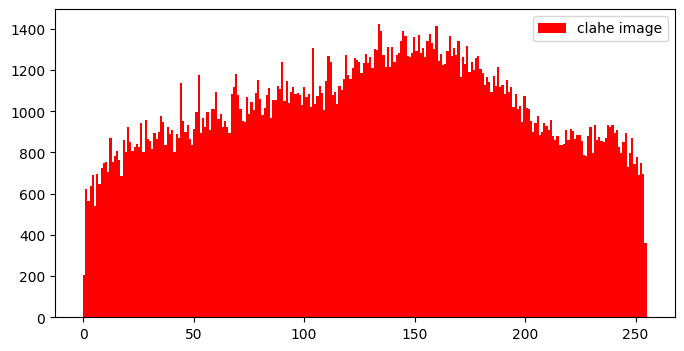

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../image/lenaColor.png')
cv2.imshow('original', img)
cv2.waitKey(0)

# ----- 3x3 Kernel 侵蝕 3 次 -----------------------------
kernel = np.ones((3, 3),np.uint8)  # try  [3, 3]
img_e = cv2.erode(img, kernel, iterations = 3)
cv2.imshow('erode', img_e)
cv2.waitKey(0)
# ------- 3x3 Kernel 膨脹 3 次 ----------
img_d = cv2.dilate(img, kernel, iterations = 3)
cv2.imshow('dilate', img_d)
cv2.waitKey(0)

# ------- 3x3 Kernel Open  ----------
img_m=cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow('Open', img_m)
cv2.waitKey(0)

# ------- 圖片取 SIFT 後, 並將她在圖上畫出特徵點----------
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img, None)   # kp指關鍵點, des指關鍵點的特徵描述
img_s = cv2.drawKeypoints(img, kp, None)
cv2.imshow(f'sift : {len(kp)}', img_s)
cv2.waitKey(0)

# ------- 自適應直方圖均衡 ------------------------------------------
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(img_g)

clahe = cv2.createCLAHE(clipLimit = 40.0, tileGridSize = (8, 8))  # AHE   # default cliplimit  = 40 
img_c = clahe.apply(img_g)

fig=plt.figure(figsize=(8, 4))
plt.hist(img_c.ravel(), 256, [0, 255], label='clahe image', color='r'), plt.legend()
cv2.imshow(f'histogram', img_c)
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)